In [17]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

## Short-term activity of of three spiders

Before proceding with this notebook, pleasse read carefully Chapter 1 of [Time Series Analysis book by George Box](https://wlu.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma991010340665504161&context=L&vid=01WLU_INST:01WLU&lang=en&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,%20Time%20series%20analysis&mode=Basic)

Open file **Practice 2_data1.csv** in MS. Excel. It should have has four columns (see image below). The first column list time (hours:minutes:seconds) and the 2-4 columns contains number of UV light crossing for the spider *s2, s4, and s6*. We will use this number of crossings as a measure of activity for a spider

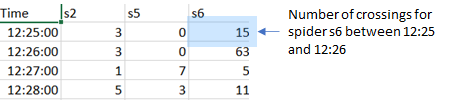

In [18]:
df = pd.read_csv('Practice 2_data1.csv')
display(df.head())

,Time,s2,s5,s6
0,12:25:00,3,0,15
1,12:26:00,3,0,63
2,12:27:00,1,7,5
3,12:28:00,5,3,11
4,12:29:00,0,0,0


## Experiment 1: Modeling spider activity with white noise

In the [first chapter of the Time series analysis book](https://learning.oreilly.com/library/view/time-series-analysis/9780470272848/08_chap01.html) we learned that the easiest model for a time series is a white noise. That is the series of random events with the same mean and variance as the data. Let's try to model our spider data with a white noise. Such experiment provides a good visual test of hypothesis if spider behavior is random or intentional. If random, the spider activity will be similar to a random noise. However, if there are some  pattern associated with spider activity, the spider behavior should be quite different than noise

### Calculate mean and standard deviation of time series for each spider

Calculate mean and standard deviation of time series for each spider. Save as a dataframe **df_summary** which has spider id in the rows and mean(mu) and standard deviation (sigma) in columns 

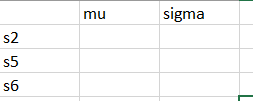

In [25]:
spider_df = ['s2','s5','s6']
mu = np.empty(3)
sigma = np.empty(3)
num = range(0,3)
for i in num:
    #calculate mean and store it 
    mean = np.mean(df[spider_df[i]])
    mu[i] = mean
    #calculate std and store it 
    std = np.std(df[spider_df[i]])
    sigma[i] = std
df_summary = pd.DataFrame(data = [mu, sigma])
#transpose of df to create correct columns
df_summary = df_summary.T
df_summary.columns = ['mu', 'sigma']
df_summary.index = spider_df
display(df_summary)

,mu,sigma
s2,0.453731,3.101773
s5,1.465672,5.373610
s6,1.614925,7.419886


### Write a function which produces a random number from normal distribution with given mean and standard deviation

write a funciton, **random_normal(mu, sigma)**, which input is two numbers(mean and standard deviation) and output a random number with given mean and standard deviation. If you are not familiar with random number generators in Python, check documentation to [np.ransom.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)

In [33]:
def random_normal(mu, sigma):
    (np.random.normal(mu, sigma))
    
(random_normal(10,10))

### Generate random time series using spiders mean and standard deviation

Now make a new data frame df_random, which is a copy of spider activity in  Week2_data1.csv. Replace every entry of spider activity with a random number with the same mean and standard deviation as spider activity. Plot spider activity and white noise on the same plot.

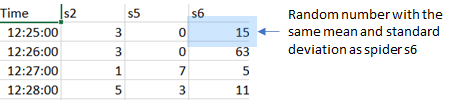

In [35]:
df = pd.read_csv('Practice 2_data1.csv')
df_random = df 

for i in range(0, df.shape[0]):
    a = abs(int(np.random.normal(df_summary.iloc[0,0], df_summary.iloc[0,1])))
    df_random.iloc[i,1] = a
    b = abs(int(np.random.normal(df_summary.iloc[1,0], df_summary.iloc[1,1])))
    df_random.iloc[i,2] = b  
    c = abs(int(np.random.normal(df_summary.iloc[2,0], df_summary.iloc[2,1])))
    df_random.iloc[i,3] = c
display(df_random)

,Time,s2,s5,s6
0,12:25:00,1,4,2
1,12:26:00,0,3,1
2,12:27:00,3,3,3
3,12:28:00,1,1,7
4,12:29:00,6,0,8
...,...,...,...,...
330,17:55:00,1,4,1
331,17:56:00,0,0,14
332,17:57:00,4,5,13
333,17:58:00,0,4,2


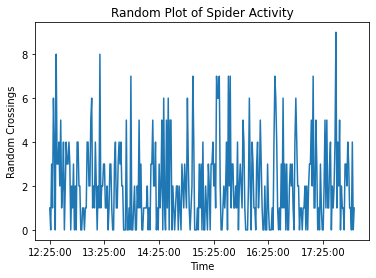

In [40]:
plt.plot(df_random.Time, df_random.s2)
plt.title('Random Plot of Spider Activity')
plt.xlabel('Time')
plt.ylabel('Random Crossings')
plt.xticks(range(0, 336, 60))
plt.show()

### Conclusion 1:

Inspect graph of spider activity and random time series. Are they simiar. Do you think the random noise is a good model for spider activity? Why/why not? Provide rational based on conntent of your reading

##### The graphs are not similar. Random noise is not a good predictor of spider activity because, even if their patterns do not follow the typical 24hr cycle, they do still follow patterns based on their light entrainment and their endogenous rhythms. Because random noise is not a good indicator of spider activity, there is a definitive pattern.

## Experiment 2: Use moving average to understand trend in spider activity

In the Time series textbook, the author describe common approach to analysis of time series data, called **moving average**. Calculate moving average for spiders in our **Practice 2_data1** file over 
- 30 sec 
- 1 minute 
- 15 min 
- 30 min

Choose type and format of visualization which make it easy for the viewer to compare the affect of  of averaging interval for each spider

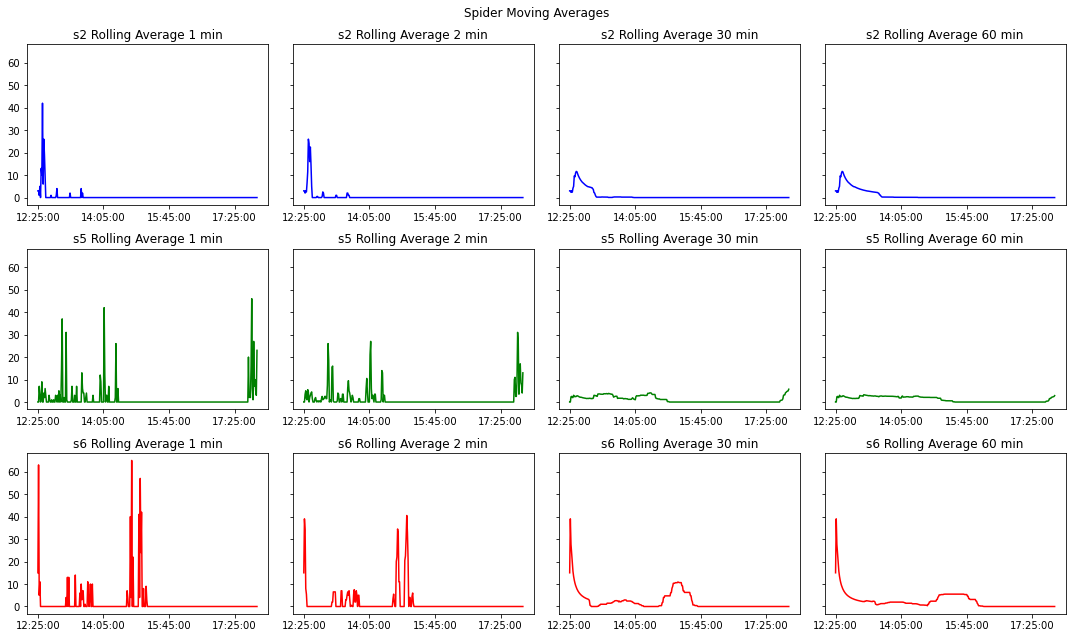

In [42]:
df = pd.read_csv('Practice 2_data1.csv')

s2_rolling1 = df.s2.rolling(1, min_periods=1).mean()
s2_rolling2 = df.s2.rolling(2, min_periods=1).mean()
s2_rolling30 = df.s2.rolling(30, min_periods=1).mean()
s2_rolling60 = df.s2.rolling(60, min_periods=1).mean()

s5_rolling1 = df.s5.rolling(1, min_periods=1).mean()
s5_rolling2 = df.s5.rolling(2, min_periods=1).mean()
s5_rolling30 = df.s5.rolling(30, min_periods=1).mean()
s5_rolling60 = df.s5.rolling(60, min_periods=1).mean()

s6_rolling1 = df.s6.rolling(1, min_periods=1).mean()
s6_rolling2 = df.s6.rolling(2, min_periods=1).mean()
s6_rolling30 = df.s6.rolling(30, min_periods=1).mean()
s6_rolling60 = df.s6.rolling(60, min_periods=1).mean()

fig, axs = plt.subplots(3, 4, figsize =(15,9), sharey=True)
plt.setp(axs, xticks=[0,100,200,300],
        yticks=[0, 10, 20, 30, 40, 50, 60])

fig.suptitle('Spider Moving Averages')

axs[0, 0].plot(df.Time[0:335], s2_rolling1[0:335], color = 'b')
axs[0, 0].set_title('s2 Rolling Average 1 min')
axs[0, 1].plot(df.Time[0:335], s2_rolling2[0:335], color = 'b')
axs[0, 1].set_title('s2 Rolling Average 2 min')
axs[0, 2].plot(df.Time[0:335], s2_rolling30[0:335], color = 'b')
axs[0, 2].set_title('s2 Rolling Average 30 min')
axs[0, 3].plot(df.Time[0:335], s2_rolling60[0:335], color = 'b')
axs[0, 3].set_title('s2 Rolling Average 60 min')

axs[1, 0].plot(df.Time[0:335], s5_rolling1[0:335], color = 'g')
axs[1, 0].set_title('s5 Rolling Average 1 min')
axs[1, 1].plot(df.Time[0:335], s5_rolling2[0:335], color = 'g')
axs[1, 1].set_title('s5 Rolling Average 2 min')
axs[1, 2].plot(df.Time[0:335], s5_rolling30[0:335], color = 'g')
axs[1, 2].set_title('s5 Rolling Average 30 min')
axs[1, 3].plot(df.Time[0:335], s5_rolling60[0:335], color = 'g')
axs[1, 3].set_title('s5 Rolling Average 60 min')

axs[2, 0].plot(df.Time[0:335], s6_rolling1[0:335], color = 'r')
axs[2, 0].set_title('s6 Rolling Average 1 min')
axs[2, 1].plot(df.Time[0:335], s6_rolling2[0:335], color = 'r')
axs[2, 1].set_title('s6 Rolling Average 2 min')
axs[2, 2].plot(df.Time[0:335], s6_rolling30[0:335], color = 'r')
axs[2, 2].set_title('s6 Rolling Average 30 min')
axs[2, 3].plot(df.Time[0:335], s6_rolling60[0:335], color = 'r')
axs[2, 3].set_title('s6 Rolling Average 60 min')

fig.tight_layout()

plt.show()

### Conclusion2:

Do you think there are any advantages of moving average? If yes, what average interval helps us to visualize overall spider activity best? Feel free to experiment with additional time intervals. Below, please provide rational for choosing a specific interval. If you feel that the different iterval is needed, please provide additional visualizations


##### There are many advantages of the rolling average. 

## Experiment 3:Summarize spider activity over 24 hours

So far, we looked at a short term(few hours) activity recordings for our spider. However, the goal of this project is to understand the **circadian**, that is close to 24 hours activity pattern. The file **Practice 2_data2.csv** contains 24 hours of spider activity. In addition to already familiar columns with time and activity of the three spider, this file also contains a light indicator. If light indicator is equal "1", then the light in recording chamber was turned on, if the indicator was equal zero, the light was turned off. 

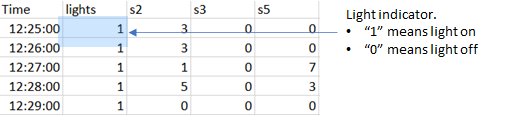

Let's plot the activity spider over the 24 hours together with the light indicator. The goal of this visualization is to help the viewer to understand if spider activity depends on light.

In [8]:
df2 = pd.read_csv('Practice 2_data2.csv')
display(df2.head())

,Time,lights,s2,s3,s5
0,12:25:00,1,3,0,0
1,12:26:00,1,3,0,0
2,12:27:00,1,1,0,7
3,12:28:00,1,5,0,3
4,12:29:00,1,0,0,0


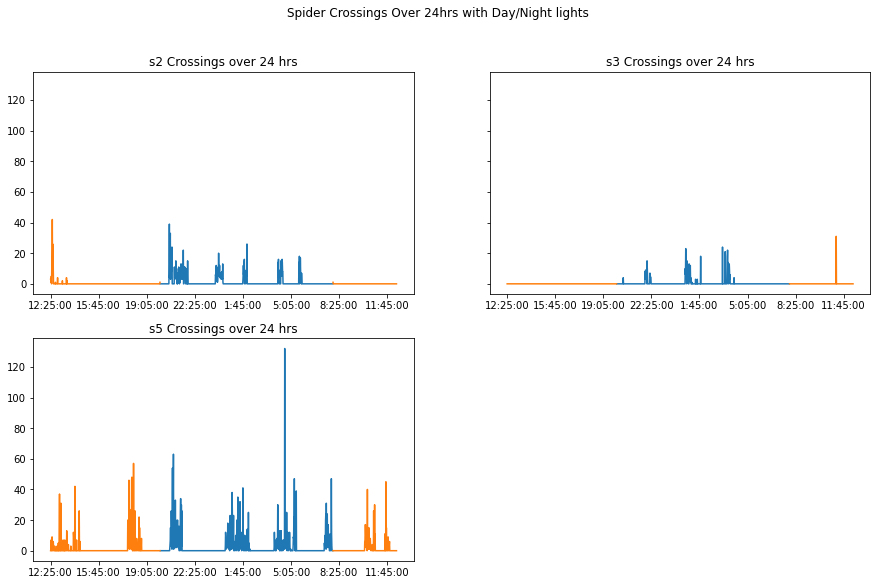

In [40]:
df2 = pd.read_csv('Practice 2_data2.csv')

t2 = df2.Time[0:1440]
a2 = df2.s2[0:1440]
s2 = df2.lights[0:1440]

t3 = df2.Time[0:1440]
a3 = df2.s3[0:1440]
s3 = df2.lights[0:1440]

t5 = df2.Time[0:1440]
a5 = df2.s5[0:1440]
s5 = df2.lights[0:1440]

ticks = range(0, 1440, 200)

supper2 = np.ma.masked_where(s2 == 0, a2)
slower2 = np.ma.masked_where(s2 > 0, a2)

supper3 = np.ma.masked_where(s3 == 0, a3)
slower3 = np.ma.masked_where(s3 > 0, a3)

supper5 = np.ma.masked_where(s5 == 0, a5)
slower5 = np.ma.masked_where(s5 > 0, a5)


fig, ax = plt.subplots(2,2, figsize = (15,9), sharey = True)

fig.delaxes(ax[1,1])

ax[0,0].plot( t2, slower2, t2, supper2)
ax[0,0].set_xticks(ticks)

ax[0,1].plot( t3, slower3, t3, supper3)
ax[0,1].set_xticks(ticks)

ax[1,0].plot( t5, slower5,t5, supper5)
ax[1,0].set_xticks(ticks)

fig.suptitle('Spider Crossings Over 24hrs with Day/Night lights')
ax[0, 0].set_title('s2 Crossings over 24 hrs')
ax[0, 1].set_title('s3 Crossings over 24 hrs')
ax[1, 0].set_title('s5 Crossings over 24 hrs')

plt.show()

###  Experiment with moving average

Try different moving average to better  visualize effect of light on spider activiyty.  Experiment with averaging over different times. Plot the resulting moving averages for each spider

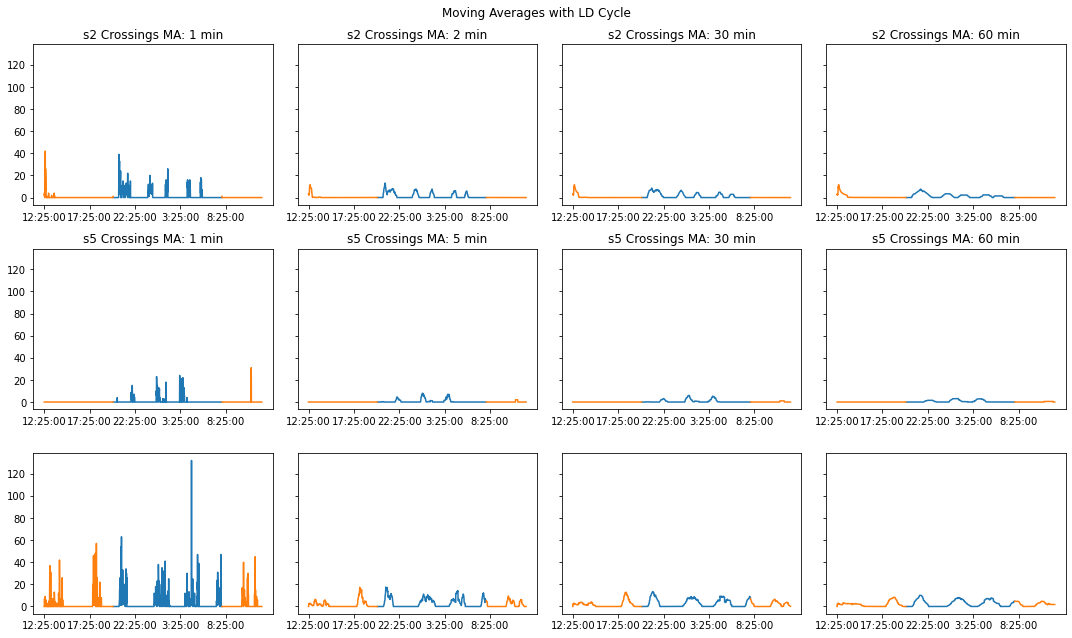

In [44]:
df2 = pd.read_csv('Practice 2_data2.csv')
df2 = df2.iloc[:1440]

df2['sma_1mins2']=df2['s2'].rolling(1,min_periods=1).mean()
df2['sma_15mins2']=df2['s2'].rolling(15,min_periods=1).mean()
df2['sma_30mins2']=df2['s2'].rolling(30,min_periods=1).mean()
df2['sma_1hours2']=df2['s2'].rolling(60,min_periods=1).mean()

 
df2['sma_1mins3']=df2['s3'].rolling(1,min_periods=1).mean()
df2['sma_15mins3']=df2['s3'].rolling(15,min_periods=1).mean()
df2['sma_30mins3']=df2['s3'].rolling(30,min_periods=1).mean()
df2['sma_1hours3']=df2['s3'].rolling(60,min_periods=1).mean()
 

df2['sma_1mins5']=df2['s5'].rolling(1,min_periods=1).mean()
df2['sma_15mins5']=df2['s5'].rolling(15,min_periods=1).mean()
df2['sma_30mins5']=df2['s5'].rolling(30,min_periods=1).mean()
df2['sma_1hours5']=df2['s5'].rolling(60,min_periods=1).mean()

fig, ax=plt.subplots(3,4, figsize=(15,9), sharey=True)
fig.suptitle('Moving Averages with LD Cycle')
plt.setp(ax, xticks=(range(0,1440,300)))

t=df2.Time

data=[df2['sma_1mins2'],df2['sma_15mins2'], df2['sma_30mins2'], df2['sma_1hours2']]
for i in range(0,4):
    a=data[i]
    s=df2.lights
    t=df2.Time
    supper=np.ma.masked_where(s < 1, a)
    slower=np.ma.masked_where(s >0,a)
    ax[0,i].plot(t,slower,t,supper)

data3=[df2['sma_1mins3'],df2['sma_15mins3'],df2['sma_30mins3'],df2['sma_1hours3']]

for i in range(0,4):
    a=data3[i]
    s=df2.lights
    t=df2.Time
    supper=np.ma.masked_where(s < 1, a)
    slower=np.ma.masked_where(s >0,a)
    ax[1,i].plot(t,slower,t,supper)

data5=[df2['sma_1mins5'],df2['sma_15mins5'],df2['sma_30mins5'],df2['sma_1hours5']]

for i in range(0,4):
    a=data5[i]
    s=df2.lights
    t=df2.Time
    supper=np.ma.masked_where(s < 1, a)
    slower=np.ma.masked_where(s >0,a)
    ax[2,i].plot(t,slower,t,supper)

    
ax[0, 0].set_title('s2 Crossings MA: 1 min')
ax[0, 1].set_title('s2 Crossings MA: 2 min')
ax[0, 2].set_title('s2 Crossings MA: 30 min')
ax[0, 3].set_title('s2 Crossings MA: 60 min')

ax[1, 0].set_title('s3 Crossings MA: 1 min')
ax[1, 1].set_title('s3 Crossings MA: 2 min')
ax[1, 2].set_title('s3 Crossings MA: 30 min')
ax[1, 3].set_title('s3 Crossings MA: 60 min')

ax[1, 0].set_title('s5 Crossings MA: 1 min')
ax[1, 1].set_title('s5 Crossings MA: 5 min')
ax[1, 2].set_title('s5 Crossings MA: 30 min')
ax[1, 3].set_title('s5 Crossings MA: 60 min')

fig.tight_layout()
plt.show()

### Conclusion 3:

Do you think the light affect spider activity? If yes, do you thinig spiders are nocturnal animal(active during dark phase) or diurnal (active during th light phase)? or

##### I believe our evidence supports that light does affect spider activity. The activity peaks we observe support spiders being nocturnal animals. 

## Experiment 4

In circadian biology, the concept of **circadian entrainment** is an essential one. We say that the animal is entrain to light, when behavioral activity follows the light stimmulus. For our experimental analysis we should be able to eliminate any animal which is not following light signal. The goal of this experiment is to develop a funciton which takes a day of spider activity, and return the boolean answer for circadian entrainment. That is, if funciton return **True** then the spider locomotor activity is entrained by a light stimulus. If funciton return **False**, the spider does not entrained by lihgt.  In the space below please develop a brief research report which defyed concept of entrainability by light, implement your concept in a python function and test your function on spiders s2, s3, and s5. The report should include:
 -  Short biological description of circadian entrainment
     - with citation of at least 3 peer-reviewed articles
 - Clear definition of entrainablility applied to a locomotor activity
     - at lease three clear criteria for a time series which is entrained to a light
 - Separate for implementation of each individual criteria described above
     - should be supported by visualization(s)
 - Function which implement all criteria to each individual spider
 - Brief comment/critique of your methodology. What caveats you might anticipate?